In [2]:
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
from astro530 import Planck, Planck_num, Box_Integrator
from scipy import integrate

In [3]:
def Box_Integrator(xvalues,yvalues):
    sum = 0
    for x in range(xvalues.size-1):
        dx = xvalues[x+1] - xvalues[x]
        sy = yvalues[x] + yvalues[x+1]
        area = sy *.5 * dx
        sum += area
    return sum

In [4]:
def Func_Integrator(function, min_x, max_x, width, temperature):
    # function is the planck funct which reqiures wavenumber and temperature both with units
    # min, max, and exp width are astropy unitless
    # but min and max need to be 1/micrometer values
    # exp_width is the delta x in 10**x
    
    #xvalues = np.linspace(min_xvalue, max_xvalue, num=exp_width)


    # trying now to make the box widths to be log instead of linear
    # the input is unitless except for temperature
    # this is so I can take the log
    # after the xvalues have been generated I then make them units of wavenumber

    
    log10_min_x = np.log10(min_x)
    log10_max_x = np.log10(max_x)
    x = np.logspace(log10_min_x, log10_max_x, num=((log10_max_x-log10_min_x)/width).astype(int))
    ## converting back to units
    x_micro = x/u.micrometer
    y_micro = function(x_micro, temperature).cgs

    #return Box_Integrator(x_micro,y_micro)
    return integrate.simpson(y_micro, x_micro)*(u.g/((u.sr)*(u.s**2)*(u.micrometer)))
    #return integrate.trapezoid(y_micro,x_micro)
    

/home/crobles/anaconda3/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


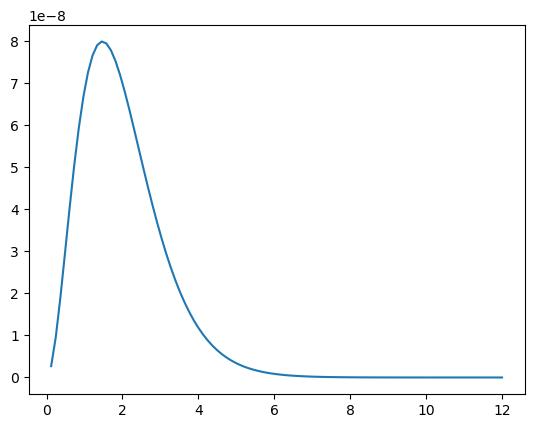

In [5]:
plt.plot(np.linspace(0,12,num=100)/u.micrometer,Planck_num(np.linspace(0,12,num=100)/u.micrometer,7500*u.K))
plt.show()

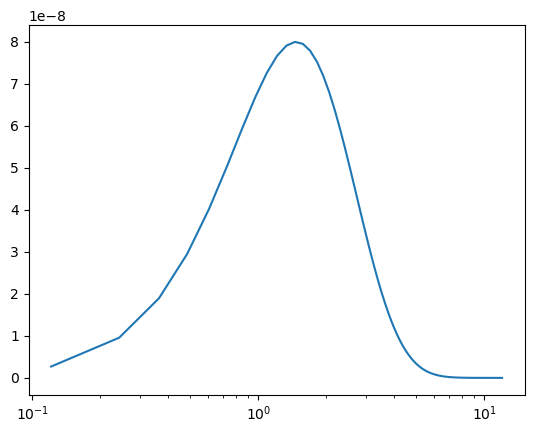

In [6]:
plt.plot(np.linspace(0,12,num=100)/u.micrometer,Planck_num(np.linspace(0,12,num=100)/u.micrometer,7500*u.K))
plt.xscale("log")
plt.show()

In [10]:
minx = .0001 #/(u.micrometer)
maxx = 12 #/(u.micrometer)
temp = 7500 * u.K
den = .001

#ans,x_stuff,y_stuff = Func_Integrator(Planck_num, minx, maxx, den, temp)

ans = Func_Integrator(Planck_num, minx, maxx, den, temp)
print((ans))
print((ans).cgs)

#plt.plot(x_stuff,y_stuff)
#plt.xscale("log")
#plt.show()

0.00019049611405352518 g / (sr um s2)
1.9049611405352518 Ba / rad2


In [17]:
def Precision(truth,calc):
    return np.absolute(1-(calc/truth))

In [18]:
def Stef_Boltz(temp):
    return const.sigma_sb*(temp**4)/(np.pi*u.sr)

In [19]:
print(Stef_Boltz(7500 * u.K).cgs)

57109310591.87346 g / (rad2 s3)


In [12]:

maxx = 25 #/(u.micrometer)
temp = 7500 * u.K
#den = .0002
den = 10**(-4)
minx_stuff = np.logspace(-7,0,100) #/ u.micrometer
#print(minx_stuff)
#print(minx_stuff)
#print(Func_Integrator(Planck_num, , maxx, den, temp))
# use these to get Planck integrator values


minx_results = np.zeros(np.size(minx_stuff))*(u.g/((u.sr)*(u.s**3)))

for x in range(np.size(minx_stuff)):
    minx_results[x] = (Func_Integrator(Planck_num, minx_stuff[x], maxx, den, temp)*const.c).cgs

# compare these values to true


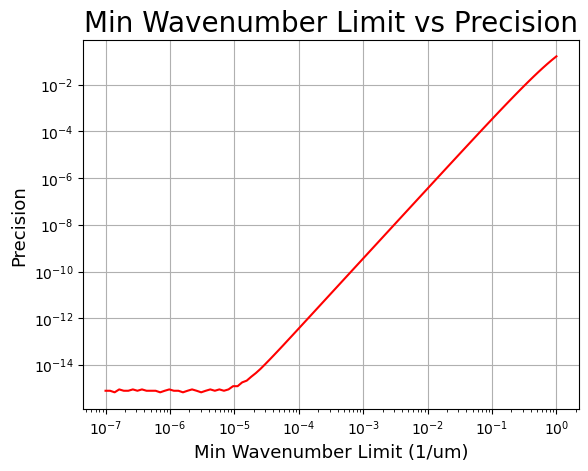

In [13]:
true = Stef_Boltz(7500 * u.K).cgs
minx_prec = Precision(true , minx_results)

plt.plot(minx_stuff, minx_prec,'r')
plt.title("Min Wavenumber Limit vs Precision",fontsize=20)
plt.ylabel("Precision",fontsize=13)
plt.xlabel("Min Wavenumber Limit (1/um)",fontsize=13)
plt.yscale("log")
plt.xscale("log")
plt.grid()
#plt.savefig('hw2_plot_1.svg', bbox_inches='tight')
plt.show()

In [21]:
# now max freq precision

minx = 10**(-5.5) #/(u.micrometer)
temp = 7500 * u.K
den = 10**(-4.5)

maxx_stuff = np.linspace(5,30,100) #/ u.micrometer

# use these to get Planck integrator values
size = np.size(maxx_stuff)
maxx_results = np.zeros(size)*(u.g/((u.sr)*(u.s**3)))

for x in range(size):
    maxx_results[x] = (Func_Integrator(Planck_num, minx, maxx_stuff[x], den, temp)*const.c).cgs

# compare these values to true

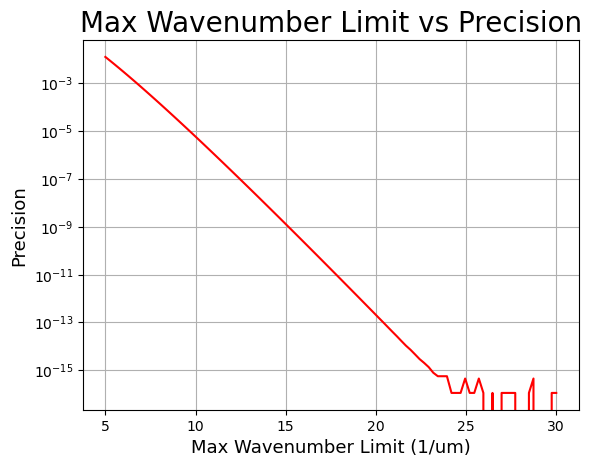

In [23]:
maxx_prec = Precision(true , maxx_results)

plt.plot(maxx_stuff, maxx_prec,'r')
plt.title("Max Wavenumber Limit vs Precision",fontsize=20)
plt.ylabel("Precision",fontsize=13)
plt.xlabel("Max Wavenumber Limit (1/um)",fontsize=13)
plt.yscale("log")
#plt.xscale("log")
plt.grid()
#plt.savefig('hw2_plot_2.svg', bbox_inches='tight')
plt.show()

In [ ]:
minx = 10**(-4.5)# /(u.micrometer)
maxx = 22 #/(u.micrometer)
temp = 7500 * u.K

width = np.flip(np.logspace(-7.5,-3,10))
# use these to get Planck integrator values
size = np.size(width)
width_results = np.zeros(size)*(u.g/((u.sr)*(u.s**3)))

for x in range(size):
    width_results[x] = (Func_Integrator(Planck_num, minx, maxx, width[x], temp)*const.c).cgs


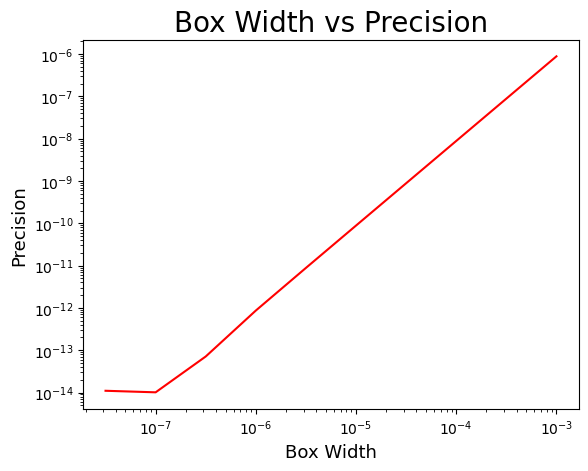

In [33]:
width_prec = Precision(true , width_results)
plt.plot(width, width_prec,'r')
plt.title("Box Width vs Precision",fontsize=20)
plt.ylabel("Precision",fontsize=13)
plt.xlabel("Box Width",fontsize=13)
plt.yscale("log")
plt.xscale("log")
#plt.savefig('hw2_plot_3.svg', bbox_inches='tight')
plt.show()

In [251]:
best_min = 10**(-5.5)
best_max = 25
best_width = 10**(-4.5)
temp = 7500 * u.K
true = Stef_Boltz(temp).cgs

calc = (Func_Integrator(Planck_num, best_min, best_max, best_width, temp)*const.c).cgs
prec = Precision(true,calc)
print("The best precision is:",prec)




The best precision is: 4.440892098500626e-16


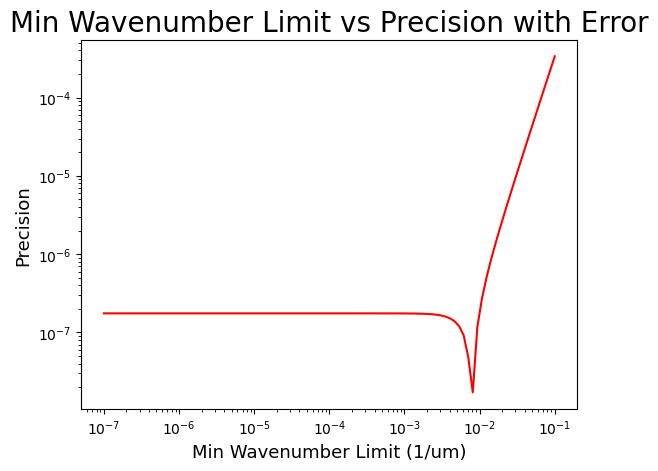

In [284]:
true = Stef_Boltz(7500 * u.K).cgs
offset=10000

minx_prec2 = Precision(true , minx_results+offset*(u.g/((u.sr)*(u.s**3))))

plt.plot(minx_stuff, minx_prec2,'r')
plt.title("Min Wavenumber Limit vs Precision with Error",fontsize=20)
plt.ylabel("Precision",fontsize=13)
plt.xlabel("Min Wavenumber Limit (1/um)",fontsize=13)
plt.yscale("log")
plt.xscale("log")
#plt.savefig('hw2_plot_4.svg', bbox_inches='tight')
plt.show()

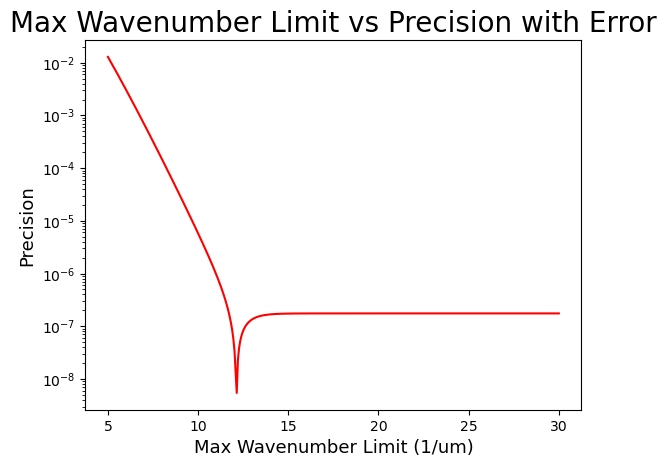

In [276]:

maxx_prec2 = Precision(true , maxx_results+offset*(u.g/((u.sr)*(u.s**3))))

plt.plot(maxx_stuff, maxx_prec2,'r')
plt.title("Max Wavenumber Limit vs Precision with Error",fontsize=20)
plt.ylabel("Precision",fontsize=13)
plt.xlabel("Max Wavenumber Limit (1/um)",fontsize=13)
plt.yscale("log")
plt.savefig('hw2_plot_5.svg', bbox_inches='tight')
#plt.show()

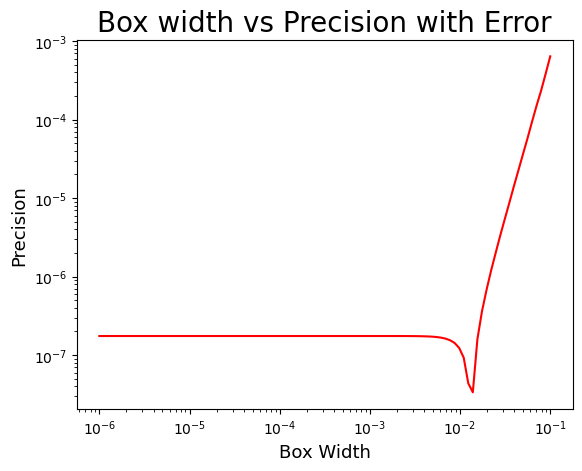

In [285]:

width_prec2 = Precision(true , width_results+offset*(u.g/((u.sr)*(u.s**3))))

plt.plot(width, width_prec2,'r')
plt.title("Box width vs Precision with Error",fontsize=20)
plt.ylabel("Precision",fontsize=13)
plt.xlabel("Box Width",fontsize=13)
plt.yscale("log")
plt.xscale("log")
#plt.savefig('hw2_plot_6.svg', bbox_inches='tight')
plt.show()

In [255]:
def diff(yvalues):
    diff_values = np.zeros(np.size(yvalues)-1)*(u.g/((u.sr)*(u.s**3)))
    for x in range(yvalues.size-1):
        diff_values[x] = np.absolute(yvalues[x+1] - yvalues[x])
  
    return diff_values

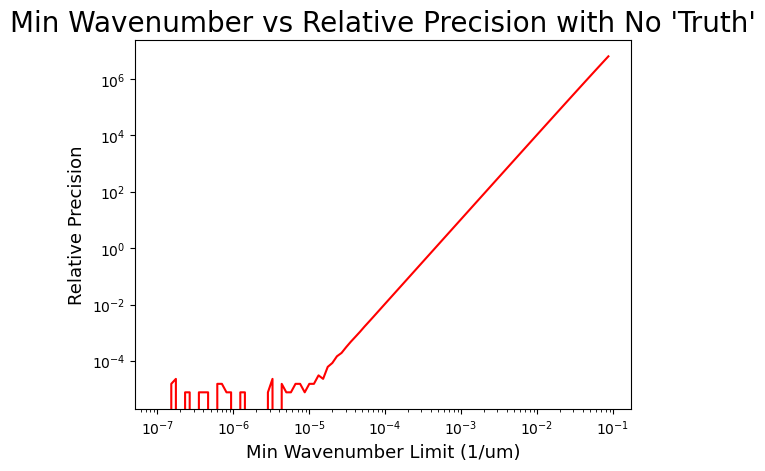

In [286]:

#print(minx_results)
plt.plot(minx_stuff[:-1], diff(minx_results),'r')
plt.title("Min Wavenumber vs Relative Precision with No 'Truth'",fontsize=20)
plt.ylabel("Relative Precision",fontsize=13)
plt.xlabel("Min Wavenumber Limit (1/um)",fontsize=13)
plt.yscale("log")
plt.xscale("log")
#plt.savefig('hw2_plot_7.svg', bbox_inches='tight')
plt.show()

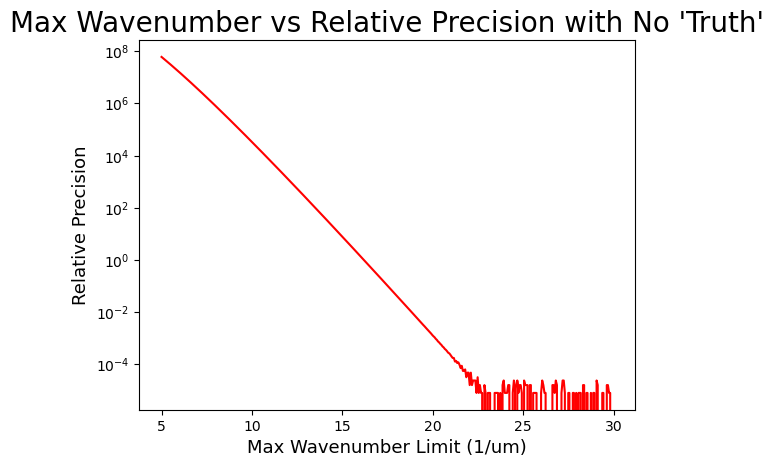

In [287]:


plt.plot(maxx_stuff[:-1], diff(maxx_results),'r')
plt.title("Max Wavenumber vs Relative Precision with No 'Truth'",fontsize=20)
plt.ylabel("Relative Precision",fontsize=13)
plt.xlabel("Max Wavenumber Limit (1/um)",fontsize=13)
plt.yscale("log")
#plt.savefig('hw2_plot_8.svg', bbox_inches='tight')
plt.show()

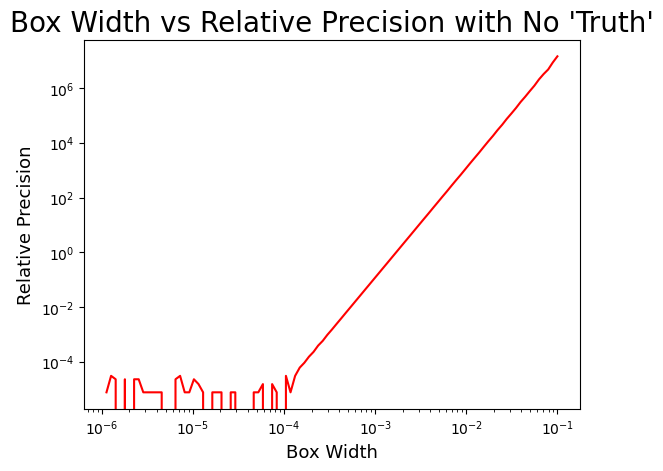

In [288]:

plt.plot(width[:-1], diff(width_results) ,'r')
plt.title("Box Width vs Relative Precision with No 'Truth'",fontsize=20)
plt.ylabel("Relative Precision",fontsize=13)
plt.xlabel("Box Width",fontsize=13)
plt.yscale("log")
plt.xscale("log")
#plt.savefig('hw2_plot_9.svg', bbox_inches='tight')
plt.show()